# 02B. Numerical integration

### Mingyang Lu

### 12/19/2023

Here, we illustrate numerical methods to solve ODEs in the context of the circuit with a constitutively expressed gene:

$$\frac{dX}{dt} = f(x) \equiv g- kX$$

##  Euler method

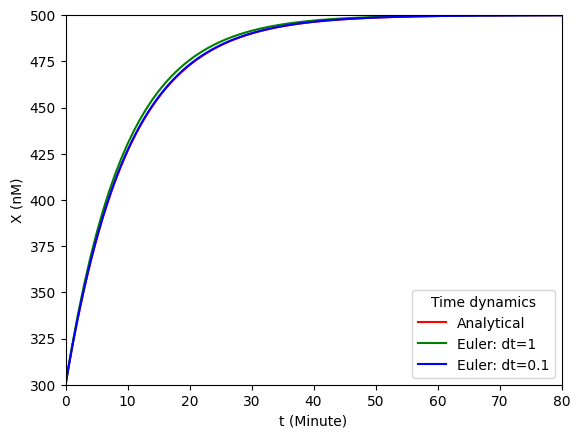

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define an analytical solution for the ODE
def ode1(X0, t_total, g, k):
    return X0 + (g / k - X0) * (1 - np.exp(-k * t_total))

# Time points for plotting
t_all = np.arange(0, 80.1, 0.1)

# Define the derivative function for the ODE
def dX(t, X, g, k):
    return g - k * X

# Euler is a generic function of Euler method for simulating ODE numerically
# The function works for a 1-variable system
# **kwargs is used to pass any keyword arguments to the function
def Euler(derivs, X0, t_total, dt, **kwargs):
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)

    X_all = np.zeros(n_all)
    X_all[0] = X0
    
    for i in range(1, n_all):
        X_all[i] = X_all[i - 1] + dt * derivs(t_all[i - 1], X_all[i - 1], **kwargs)
    
    return np.column_stack((t_all, X_all))  # Output array of t & X(t) for all time steps

# Model parameters
g = 50
k = 0.1

# Numerical solution using Euler method with different time step sizes
results1 = Euler(derivs=dX, X0=300, t_total=80, dt=1, g=g, k=k)
results2 = Euler(derivs=dX, X0=300, t_total=80, dt=0.1, g=g, k=k)

# Plotting
plt.plot(t_all, ode1(X0=300, t_total=t_all, g=g, k=k), label="Analytical", color='red')
plt.plot(results1[:, 0], results1[:, 1], label="Euler: dt=1", color='green')
plt.plot(results2[:, 0], results2[:, 1], label="Euler: dt=0.1", color='blue')

plt.xlabel("t (Minute)")
plt.ylabel("X (nM)")
plt.xlim(0, 80)
plt.ylim(300, 500)
plt.legend(loc="lower right", title="Time dynamics")
plt.show()


Zoom-in view of the time trajectories

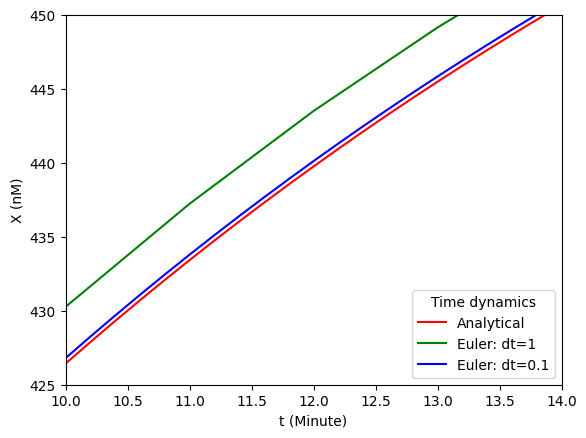

In [2]:
# Plotting
plt.plot(t_all, ode1(X0=300, t_total=t_all, g=g, k=k), label="Analytical", color='red')
plt.plot(results1[:, 0], results1[:, 1], label="Euler: dt=1", color='green')
plt.plot(results2[:, 0], results2[:, 1], label="Euler: dt=0.1", color='blue')

plt.xlabel("t (Minute)")
plt.ylabel("X (nM)")
plt.xlim(10, 14)
plt.ylim(425, 450)
plt.legend(loc="lower right", title="Time dynamics")
plt.show()

Note there isn't a dedicated Euler method function in the scipy library.
## Heun method

In [3]:
# 2nd order ODE integrator: Heun method
def Heun(derivs, X0, t_total, dt, **kwargs):
    # derivs: the function of the derivatives 
    # X0: initial condition
    # t.total: total simulation time, assuming t starts from 0 at the beginning
    # dt: time step size 
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    X_all = np.zeros(n_all)
    X_all[0] = X0
    
    for i in range(0, n_all - 1):
        k1 = dt * derivs(t_all[i], X_all[i], **kwargs)
        xb = X_all[i] + k1
        k2 = dt * derivs(t_all[i + 1], xb, **kwargs)
        X_all[i + 1] = X_all[i] + (k1 + k2) / 2
    
    return np.column_stack((t_all, X_all))  # the output is a matrix of t & X(t) for all time steps

## 2nd-order Runge-Kutta method (RK2)

In [4]:
# 2nd order Runge-Kutta (RK2)
def RK2(derivs, X0, t_total, dt, **kwargs):
    # derivs: the function of the derivatives 
    # X0: initial condition
    # t_total: total simulation time
    # dt: time step size 
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    X_all = np.zeros(n_all)
    X_all[0] = X0
    
    for i in range(0, n_all - 1):
        k1 = dt * derivs(t_all[i], X_all[i], **kwargs)
        k2 = dt * derivs(t_all[i] + dt/2, X_all[i] + k1/2, **kwargs)
        X_all[i + 1] = X_all[i] + k2
    
    return np.column_stack((t_all, X_all))  # the output is a matrix of t & X(t) for all time steps

# Fourth order Runge-Kutta method (RK4)

In [5]:
# 4th order Runge-Kutta (RK4)
def RK4(derivs, X0, t_total, dt, **kwargs):
    # derivs: the function of the derivatives 
    # X0: initial condition
    # t_total: total simulation time, assuming t starts from 0 at the beginning
    # dt: time step size 
    t_all = np.arange(0, t_total + dt, dt)
    n_all = len(t_all)
    X_all = np.zeros(n_all)
    X_all[0] = X0
    
    for i in range(0, n_all - 1):
        t_0 = t_all[i]
        t_0_5 = t_0 + 0.5 * dt
        t_1 = t_0 + dt
        
        k1 = dt * np.array(derivs(t_0, X_all[i], **kwargs))
        k2 = dt * np.array(derivs(t_0_5, X_all[i] + k1/2, **kwargs))
        k3 = dt * np.array(derivs(t_0_5, X_all[i] + k2/2, **kwargs))
        k4 = dt * np.array(derivs(t_1, X_all[i] + k3, **kwargs))
        
        X_all[i + 1] = X_all[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return np.column_stack((t_all, X_all))  # the output is a matrix of t & X(t) for all time steps

## Comparisons between various integrators

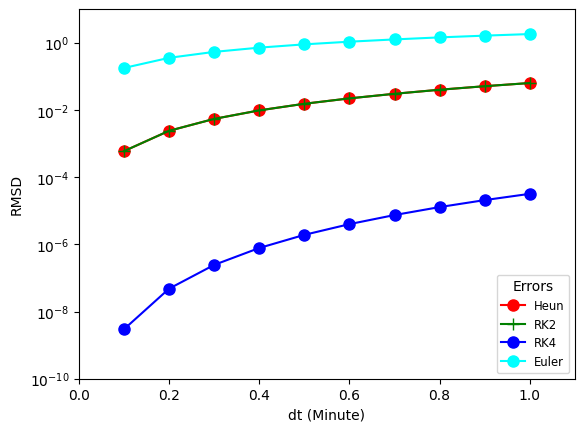

In [6]:
# Root Mean Square deviation (RMSD)
def rmsd(array1, array2):
    num = len(array1)
    diff = array1 - array2
    return np.sqrt(np.sum(diff**2) / num)

# Comparison of methods using different time step sizes
dt_all = np.arange(0.1, 1.1, 0.1)

errors_Euler = np.zeros_like(dt_all)
errors_Heun = np.zeros_like(dt_all)
errors_RK2 = np.zeros_like(dt_all)
errors_RK4 = np.zeros_like(dt_all)

ind = 0
for dt in dt_all:
    t_all = np.arange(0, 80 + dt, dt)  # time points to compute

    results_ode = ode1(X0=300, t_total=t_all, g=g, k=k)  # exact solutions
    results_Heun = Heun(derivs=dX, X0=300, t_total=80, dt=dt, g=g, k=k) # dX/dt = g - k * X
    results_RK2 = RK2(derivs=dX, X0=300, t_total=80, dt=dt, g=g, k=k)
    results_RK4 = RK4(derivs=dX, X0=300, t_total=80, dt=dt, g=g, k=k)
    results_Euler = Euler(derivs=dX, X0=300, t_total=80, dt=dt, g=g, k=k)

    errors_Heun[ind] = rmsd(results_ode, results_Heun[:, 1])
    errors_RK2[ind] = rmsd(results_ode, results_RK2[:, 1])
    errors_RK4[ind] = rmsd(results_ode, results_RK4[:, 1])
    errors_Euler[ind] = rmsd(results_ode, results_Euler[:, 1])
    ind = ind + 1

plt.plot(dt_all, errors_Heun, 'o-', color='red', label="Heun", markersize=8)
plt.plot(dt_all, errors_RK2, '+-', color='green', label="RK2", markersize=8)
plt.plot(dt_all, errors_RK4, 'o-', color='blue', label="RK4", markersize=8)
plt.plot(dt_all, errors_Euler, 'o-', color='cyan', label="Euler", markersize=8)

plt.xscale("linear")
plt.yscale("log")
plt.xlabel("dt (Minute)")
plt.ylabel("RMSD")
plt.xlim(0, 1.1)
plt.ylim(1e-10, 10)

plt.legend(loc="lower right", title="Errors", markerscale=1, fontsize='small')
plt.show()

## Backward Euler method

The EUler method is an explicit method, where $X_{n+1} = X_n + hf(X_n, t)$. In the current method, we have

$$X_{n+1} = X_n + h(g-kX_n) = hg + (1-hk)X_n $$.

The integrator becomes unstable when $h > \frac{1}{k}$.


The backward Euler method takes the formula:

$$X_{n+1} = X_n + hf(X_{n+1}, t_{n+1})$$

Here, $f(N_{n+1},t_{n+1}) = g - kX_{n+1}$. Thus,$$ X_{n+1} = \frac{X_n + hg}{1 + hk}$$

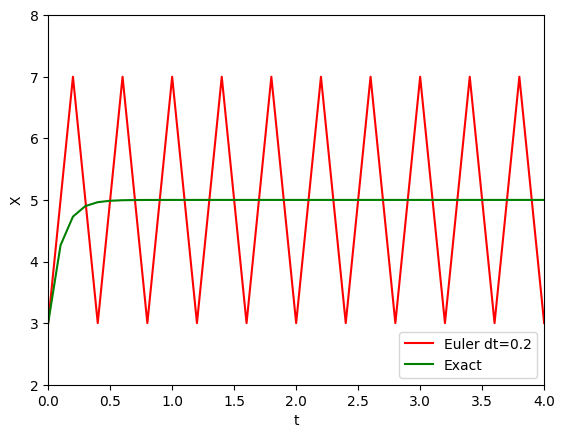

In [7]:
# Given parameters
g = 50
k = 10
t_total = 4

# Time points to plot
t_all = np.arange(0, t_total + 0.1, 0.1)

# Run Euler simulation
result_euler = Euler(derivs=dX, X0=3, t_total=t_total, dt=0.2, g=g, k=k)

# Compute the analytical solution
result_exact = np.column_stack((t_all, ode1(X0=3, t_total=t_all, g=g, k=k)))

# Plotting the outcomes
plt.plot(result_euler[:, 0], result_euler[:, 1], 'r-', label="Euler dt=0.2")
plt.plot(result_exact[:, 0], result_exact[:, 1], 'g-', label="Exact")
plt.xlabel("t")
plt.ylabel("X")
plt.xlim(0, t_total)
plt.ylim(2, 8)
plt.legend(loc="lower right")
plt.show()

The backward Euler method takes the formula:

$$X_{n+1} = X_n + hf(X_{n+1}, t_{n+1})$$

Here, $f(N_{n+1},t_{n+1}) = g - kX_{n+1}$. Thus,

$$ X_{n+1} = \frac{X_n + hg}{1 + hk}$$

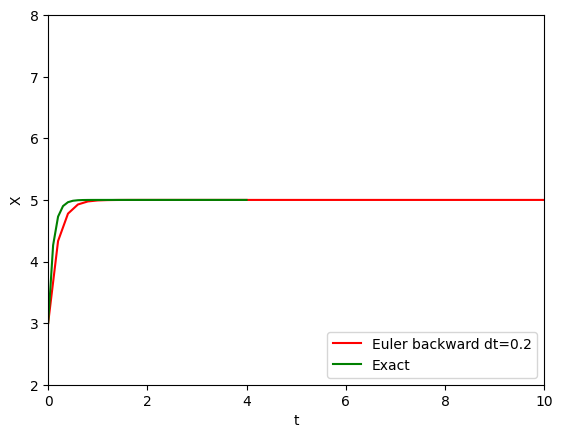

In [8]:
# Backward Euler for the gene expression model
def euler_backward_1g(t0, X0, t_total, dt, g, k):
    # t0: initial time
    # X0: initial condition
    # t_total: total simulation time
    # dt: time step size 
    # g, k: parameters
    t_all = np.arange(t0, t_total + dt, dt)
    n_all = len(t_all)
    X_all = np.zeros(n_all)
    X_all[0] = X0

    for i in range(1, n_all):
        X_all[i] = (X_all[i - 1] + dt * g) / (1 + dt * k)

    return np.column_stack((t_all, X_all))  # the output is a matrix of t & X(t) for all time steps

# Run Euler backward simulation
t_total = 10  # Adjust the total simulation time accordingly
result_euler_backward = euler_backward_1g(t0=0, X0=3, t_total=t_total, dt=0.2, g=g, k=k)

# Plotting the outcomes
plt.plot(result_euler_backward[:, 0], result_euler_backward[:, 1], 'r-', label="Euler backward dt=0.2")
plt.plot(result_exact[:, 0], result_exact[:, 1], 'g-', label="Exact")
plt.xlabel("t")
plt.ylabel("X")
plt.xlim(0, t_total)
plt.ylim(2, 8)
plt.legend(loc="lower right")
plt.show()